In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### Reading data from csv files for foursquare, yelp and city bikes for miami city

In [114]:
city_bikes_foursquare_df = pd.read_csv('city_bikes_foursquare_df.csv', index_col=[0])
city_bikes_yelp_df = pd.read_csv('city_bikes_yelp_df.csv', index_col=[0])
df_city_bikes_paris = pd.read_csv('df_city_bikes_paris.csv', index_col=[0])
df_yelp_foursq_merged =  pd.read_csv('df_yelp_foursq_merged.csv', index_col=[0])

In [115]:
city_bikes_foursquare_df.head(2)

,Unnamed: 0.1,fsq_id,name,distance,latitude,longitude,categories,city_bikes_ll
0,0,502e6bb9e4b0eed9c30f0e43,Bar de l'Hôtel Raphaël,662,48.862172,2.282686,Hotel Bar,"48.865983,2.275725"
1,1,4c549caf72cf0f472cc4d3d4,Au barbar,278,48.863712,2.277680,Bar,"48.865983,2.275725"


In [116]:
city_bikes_yelp_df.head(2)

,name,rating,review_count,latitude,longitude,categories,location,city_bikes_ll
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725"
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725"


In [117]:
df_city_bikes_paris.head(2)

,latitude,longitude,Lat-Long,name,free_bikes,empty_slots,extra.uid
0,48.865983,2.275725,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,16107
1,48.853756,2.339096,"48.85375581057431,2.3390958085656166",André Mazet - Saint-André des Arts,1,53,6015


In [118]:
df_city_bikes_paris = df_city_bikes_paris.rename(columns={'Lat-Long' : 'city_bikes_ll'})

In [119]:
df_city_bikes_paris.head(2)

,latitude,longitude,city_bikes_ll,name,free_bikes,empty_slots,extra.uid
0,48.865983,2.275725,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,16107
1,48.853756,2.339096,"48.85375581057431,2.3390958085656166",André Mazet - Saint-André des Arts,1,53,6015


In [120]:
df_yelp_foursq_merged.head()

,name,rating,review_count,latitude_x,longitude_x,categories_x,location,city_bikes_ll_x,fsq_id,distance,latitude_y,longitude_y,categories_y,city_bikes_ll_y
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",4e975f0f30f8ca78ea3dda0b,206,48.868191,2.284522,"Burger Joint, French Restaurant, New American ...","48.86795222470859,2.28146318346262"
3,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",4c9524b003413704540379ef,189,48.865170,2.286653,"Pizzeria, Fast Food Restaurant, Brasserie","48.863354122371,2.2864209115505"
4,Sgabetti,4.5,39,48.865831,2.283666,Italian,15 rue Sablons,"48.865983,2.275725",4bf82e724a67c92860f224cf,247,48.865756,2.283651,"Brasserie, Italian Restaurant","48.863875,2.28189"
6,Hiramatsu,4.5,32,48.865070,2.287510,French,52 rue de Longchamp,"48.865983,2.275725",4adcda15f964a520793721e3,209,48.865147,2.287413,French Restaurant,"48.863354122371,2.2864209115505"
7,Bon,4.0,119,48.860180,2.274980,"French, Pan Asian",25 rue de la Pompe,"48.865983,2.275725",4b536e89f964a520b19c27e3,146,48.860052,2.274863,"Asian Restaurant, French Restaurant, Japanese ...","48.86106902949534,2.2730283066630363"


In [121]:
df_yelp_foursq_merged = df_yelp_foursq_merged.rename(columns={'city_bikes_ll_x' : 'city_bikes_ll'})

## Find the total slots available in each station to calculate station usage in percentage


### Calculation station usage percentage

In [123]:
df_city_bikes_paris['Total_slots'] = df_city_bikes_paris['free_bikes'] + df_city_bikes_paris['empty_slots']

In [124]:
df_city_bikes_paris['Station_usage_percentage'] = (df_city_bikes_paris['empty_slots'] / df_city_bikes_paris['Total_slots']) * 100

In [125]:
df_city_bikes_paris.head()

,latitude,longitude,city_bikes_ll,name,free_bikes,empty_slots,extra.uid,Total_slots,Station_usage_percentage
0,48.865983,2.275725,"48.865983,2.275725",Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
1,48.853756,2.339096,"48.85375581057431,2.3390958085656166",André Mazet - Saint-André des Arts,1,53,6015,54,98.148148
2,48.867872,2.364898,"48.867872484749,2.3648982158072",Faubourg Du Temple - Republique,6,27,11037,33,81.818182
3,48.856452,2.334852,"48.856451985395786,2.334851883351803",Beaux-Arts - Bonaparte,4,16,6021,20,80.000000
4,48.879296,2.337360,"48.87929591733507,2.3373600840568547",Toudouze - Clauzel,3,17,9020,20,85.000000


### Merging dataframe from Yelp and City bikes on Latitude and longitude

In [126]:
city_bikes_yelp_merged = pd.merge(city_bikes_yelp_df,df_city_bikes_paris,on='city_bikes_ll')

In [127]:
city_bikes_yelp_merged.head()

,name_x,rating,review_count,latitude_x,longitude_x,categories,location,city_bikes_ll,latitude_y,longitude_y,name_y,free_bikes,empty_slots,extra.uid,Total_slots,Station_usage_percentage
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
2,L'Astrance,4.5,62,48.858440,2.287340,French,4 rue Beethoven,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
3,Crêperie Framboise Passy-Trocadéro,4.5,64,48.858829,2.285040,"Creperies, Gluten-Free",10 bd Delessert,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
4,Girafe,3.5,93,48.862584,2.288581,"French, Seafood",1 place du Trocadéro,"48.865983,2.275725",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286


In [128]:
city_bikes_yelp_merged.shape

(4383, 16)

### Merging dataframe from Yelp,Foursquare  and City bikes on Latitude and longitude


In [129]:
city_bikes_yelp_foursquare_merged = pd.merge(df_yelp_foursq_merged,df_city_bikes_paris,on='city_bikes_ll')

In [130]:
city_bikes_yelp_foursquare_merged.head()

,name_x,rating,review_count,latitude_x,longitude_x,categories_x,location,city_bikes_ll,fsq_id,distance,...,categories_y,city_bikes_ll_y,latitude,longitude,name_y,free_bikes,empty_slots,extra.uid,Total_slots,Station_usage_percentage
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",4e975f0f30f8ca78ea3dda0b,206,...,"Burger Joint, French Restaurant, New American ...","48.86795222470859,2.28146318346262",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",4c9524b003413704540379ef,189,...,"Pizzeria, Fast Food Restaurant, Brasserie","48.863354122371,2.2864209115505",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
2,Sgabetti,4.5,39,48.865831,2.283666,Italian,15 rue Sablons,"48.865983,2.275725",4bf82e724a67c92860f224cf,247,...,"Brasserie, Italian Restaurant","48.863875,2.28189",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
3,Hiramatsu,4.5,32,48.865070,2.287510,French,52 rue de Longchamp,"48.865983,2.275725",4adcda15f964a520793721e3,209,...,French Restaurant,"48.863354122371,2.2864209115505",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
4,Bon,4.0,119,48.860180,2.274980,"French, Pan Asian",25 rue de la Pompe,"48.865983,2.275725",4b536e89f964a520b19c27e3,146,...,"Asian Restaurant, French Restaurant, Japanese ...","48.86106902949534,2.2730283066630363",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286


In [131]:
city_bikes_yelp_foursquare_merged.shape

(1675, 22)

In [176]:
city_bikes_yelp_foursquare_merged.to_csv('city_bikes_yelp_foursquare_merged.csv')

## Exporting merged dataframe to csv

In [80]:
city_bikes_yelp_merged.to_csv('city_bikes_yelp_merged.csv')

In [81]:
city_bikes_yelp_merged.shape

(4383, 16)

# EDA and visualiztions

### We can consider rating, reviews and try to check the relationship with no. of bikes available. Also we have calculated Total percentage usage of a bike station as metric to measure if there is any relationship between ratings/reviews and bike stations

### Check for correlation in the data frame

In [154]:
city_bikes_yelp_merged.corr()

,rating,review_count,latitude_x,longitude_x,latitude_y,longitude_y,free_bikes,empty_slots,Total_slots,Station_usage_percentage
rating,1.000000,0.042204,-0.029507,-0.005046,-0.033500,-0.000996,-0.013144,0.054227,0.048868,0.043762
review_count,0.042204,1.000000,0.029491,0.001544,0.023615,-0.000005,-0.057444,0.134518,0.098320,0.133024
latitude_x,-0.029507,0.029491,1.000000,-0.142330,0.989281,-0.139584,-0.034062,0.038937,0.012381,0.032924
longitude_x,-0.005046,0.001544,-0.142330,1.000000,-0.138873,0.994503,-0.007107,0.060825,0.061856,0.035559
latitude_y,-0.033500,0.023615,0.989281,-0.138873,1.000000,-0.138661,-0.035311,0.036292,0.008254,0.031811
longitude_y,-0.000996,-0.000005,-0.139584,0.994503,-0.138661,1.000000,-0.005106,0.059119,0.061783,0.033655
free_bikes,-0.013144,-0.057444,-0.034062,-0.007107,-0.035311,-0.005106,1.000000,-0.537705,0.317438,-0.848236
empty_slots,0.054227,0.134518,0.038937,0.060825,0.036292,0.059119,-0.537705,1.000000,0.628837,0.794677
Total_slots,0.048868,0.098320,0.012381,0.061856,0.008254,0.061783,0.317438,0.628837,1.000000,0.111768
Station_usage_percentage,0.043762,0.133024,0.032924,0.035559,0.031811,0.033655,-0.848236,0.794677,0.111768,1.000000


### Plotting pair plots for there columns

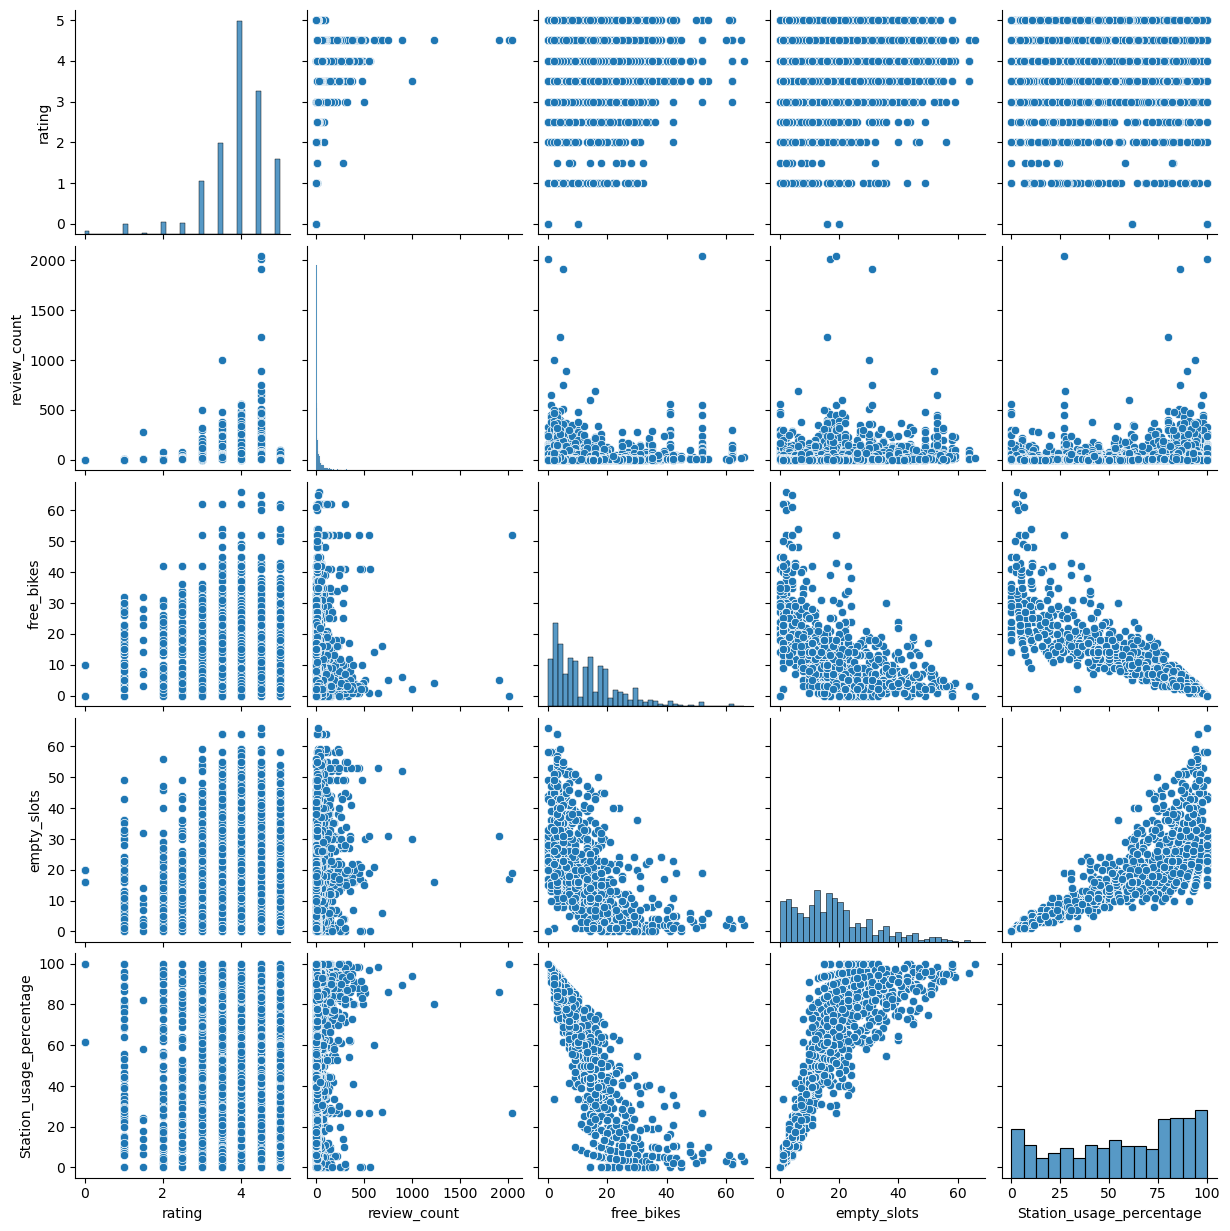

In [132]:
sns.pairplot(city_bikes_yelp_merged,vars=['rating','review_count','free_bikes','empty_slots','Station_usage_percentage'])
plt.show()

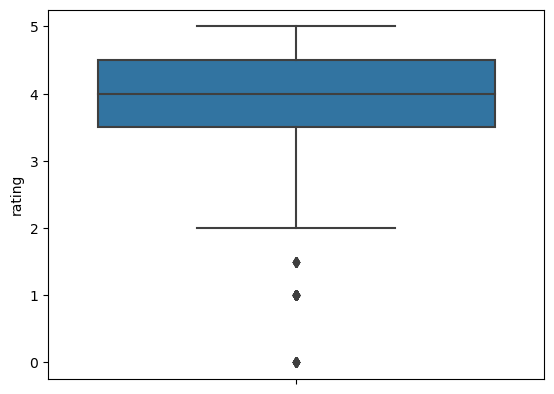

In [82]:
sns.boxplot( y=city_bikes_yelp_merged["rating"] );
plt.show()

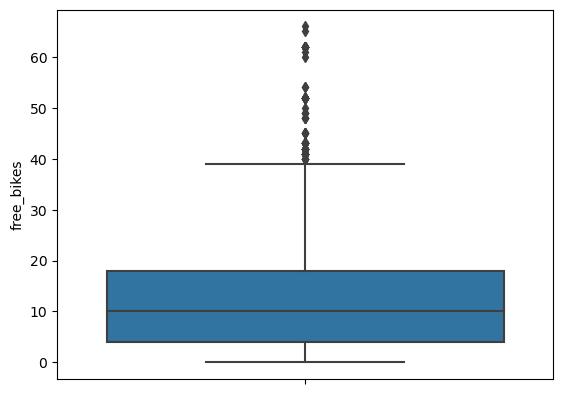

In [83]:
sns.boxplot( y=city_bikes_yelp_merged["free_bikes"] );
plt.show()

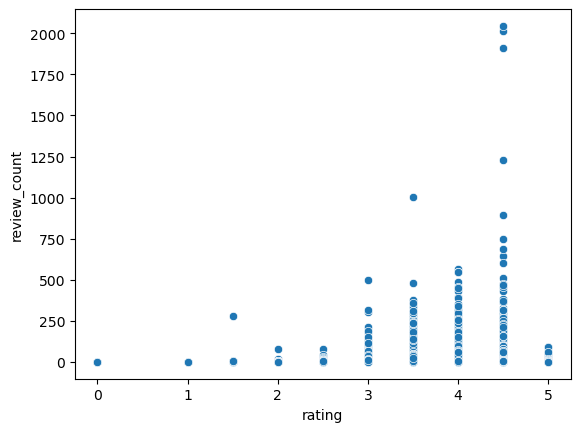

In [84]:
sns.scatterplot(data=city_bikes_yelp_merged, x="rating", y="review_count")
plt.show()

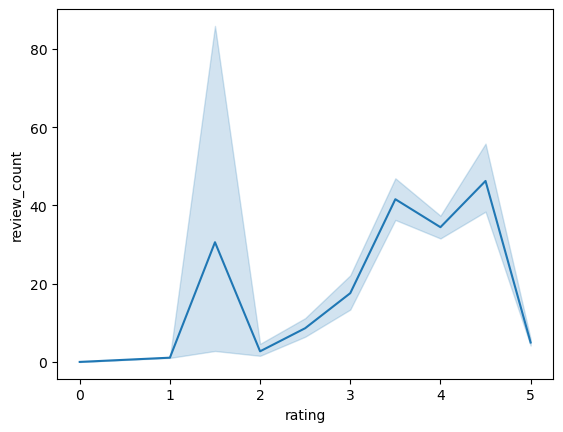

In [85]:
sns.lineplot(data=city_bikes_yelp_merged, x="rating", y="review_count")
plt.show()

### We observe that the POIs with rating between 3 and 4.5 has more reviews

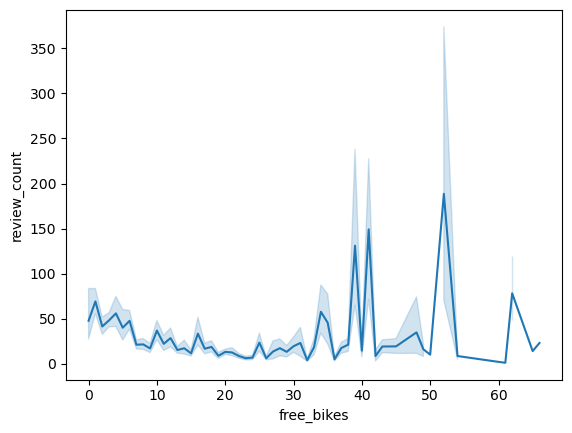

In [86]:
sns.lineplot(data=city_bikes_yelp_merged, x="free_bikes", y="review_count")
plt.show()

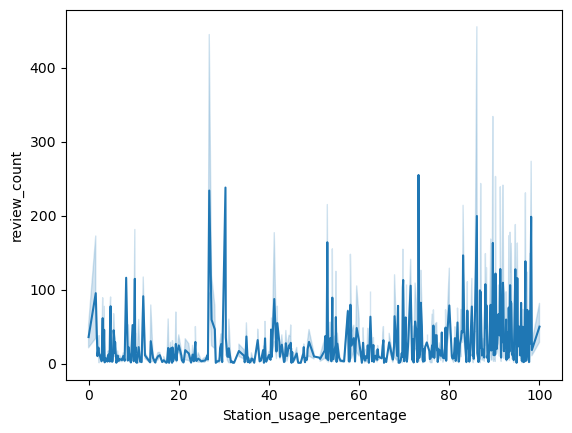

In [87]:
sns.lineplot(data=city_bikes_yelp_merged, x="Station_usage_percentage", y="review_count")
plt.show()

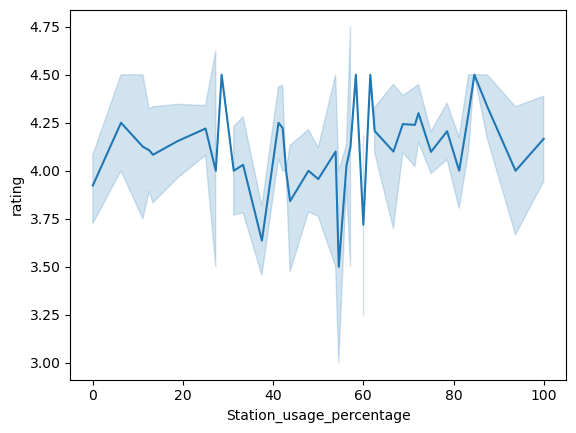

In [71]:
sns.lineplot(data=city_bikes_yelp_merged, x="Station_usage_percentage", y="rating")
plt.show()

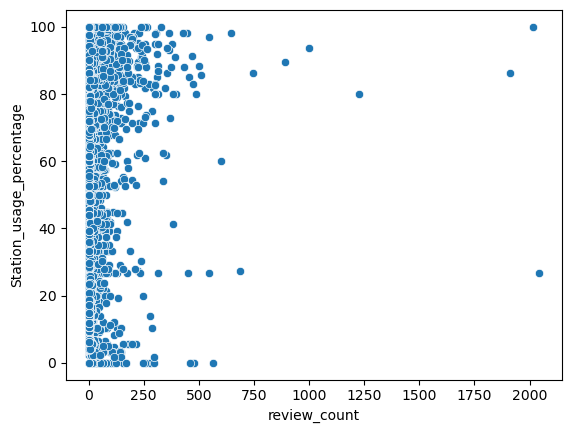

In [88]:
sns.scatterplot(data=city_bikes_yelp_merged, x="review_count", y="Station_usage_percentage")
plt.show()

### Lets group by lat long of a bike station and sum the reviews to explorer

In [136]:
df_sum_of_review_by_ll = city_bikes_yelp_merged.groupby(by=['city_bikes_ll','Station_usage_percentage'])['review_count'].sum().to_frame(name = 'review_count').reset_index()

In [137]:
df_sum_of_review_by_ll.head()

,city_bikes_ll,Station_usage_percentage,review_count
0,"48.764615483395254,2.4071189761161804",14.705882,4
1,"48.7672039733195,2.4144977331161503",10.526316,15
2,"48.77093586667601,2.4034014344215398",48.000000,23
3,"48.774703,2.373685",91.666667,20
4,"48.7769529826096,2.2957214713096623",48.484848,97


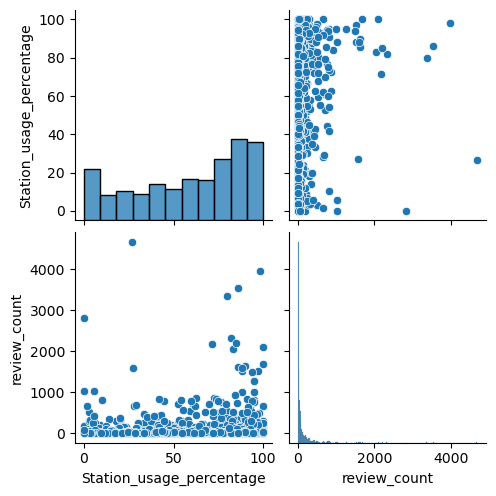

In [138]:
sns.pairplot(df_sum_of_review_by_ll)
plt.show()

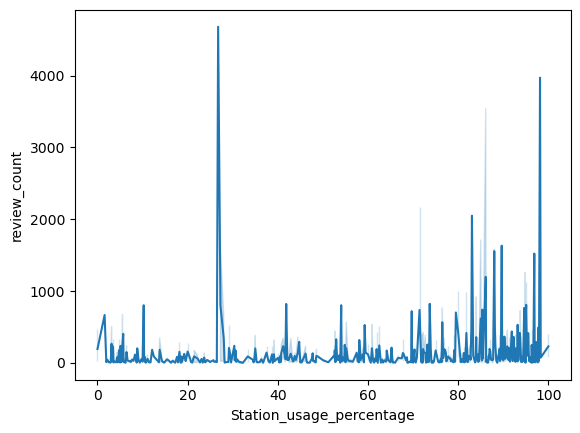

In [141]:
sns.lineplot(data=df_sum_of_review_by_ll, x="Station_usage_percentage", y="review_count")
plt.show()

### Lets group by lat long of a bike station and average the rating to explorer

In [149]:
df_avg_of_review_by_ll = city_bikes_yelp_merged.groupby(by=['city_bikes_ll','Station_usage_percentage'])['rating'].mean().to_frame(name = 'rating_mean').reset_index()

In [151]:
df_avg_of_review_by_ll.head()

,city_bikes_ll,Station_usage_percentage,rating_mean
0,"48.764615483395254,2.4071189761161804",14.705882,3.250000
1,"48.7672039733195,2.4144977331161503",10.526316,4.125000
2,"48.77093586667601,2.4034014344215398",48.000000,3.923077
3,"48.774703,2.373685",91.666667,4.083333
4,"48.7769529826096,2.2957214713096623",48.484848,3.833333


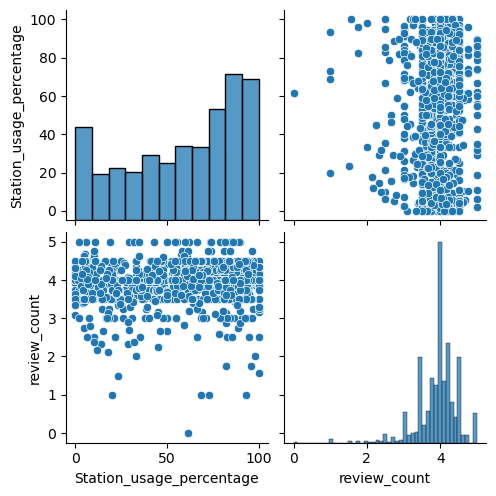

In [148]:
sns.pairplot(df_avg_of_review_by_ll)
plt.show()

## Lets check if distance metric has any impact on reviews and rating. For this we will use the merged dataframe from yelp,foursquare and citybikes

In [159]:
city_bikes_yelp_foursquare_merged.head()

,name_x,rating,review_count,latitude_x,longitude_x,categories_x,location,city_bikes_ll,fsq_id,distance,...,categories_y,city_bikes_ll_y,latitude,longitude,name_y,free_bikes,empty_slots,extra.uid,Total_slots,Station_usage_percentage
0,La Coïncidence,4.5,509,48.868105,2.284365,French,15 rue Mesnil,"48.865983,2.275725",4e975f0f30f8ca78ea3dda0b,206,...,"Burger Joint, French Restaurant, New American ...","48.86795222470859,2.28146318346262",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
1,Le Poincaré,4.0,142,48.865057,2.286521,"French, Brasseries, Wine Bars",22 avenue Raymond Poincaré,"48.865983,2.275725",4c9524b003413704540379ef,189,...,"Pizzeria, Fast Food Restaurant, Brasserie","48.863354122371,2.2864209115505",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
2,Sgabetti,4.5,39,48.865831,2.283666,Italian,15 rue Sablons,"48.865983,2.275725",4bf82e724a67c92860f224cf,247,...,"Brasserie, Italian Restaurant","48.863875,2.28189",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
3,Hiramatsu,4.5,32,48.865070,2.287510,French,52 rue de Longchamp,"48.865983,2.275725",4adcda15f964a520793721e3,209,...,French Restaurant,"48.863354122371,2.2864209115505",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286
4,Bon,4.0,119,48.860180,2.274980,"French, Pan Asian",25 rue de la Pompe,"48.865983,2.275725",4b536e89f964a520b19c27e3,146,...,"Asian Restaurant, French Restaurant, Japanese ...","48.86106902949534,2.2730283066630363",48.865983,2.275725,Benjamin Godard - Victor Hugo,5,30,16107,35,85.714286


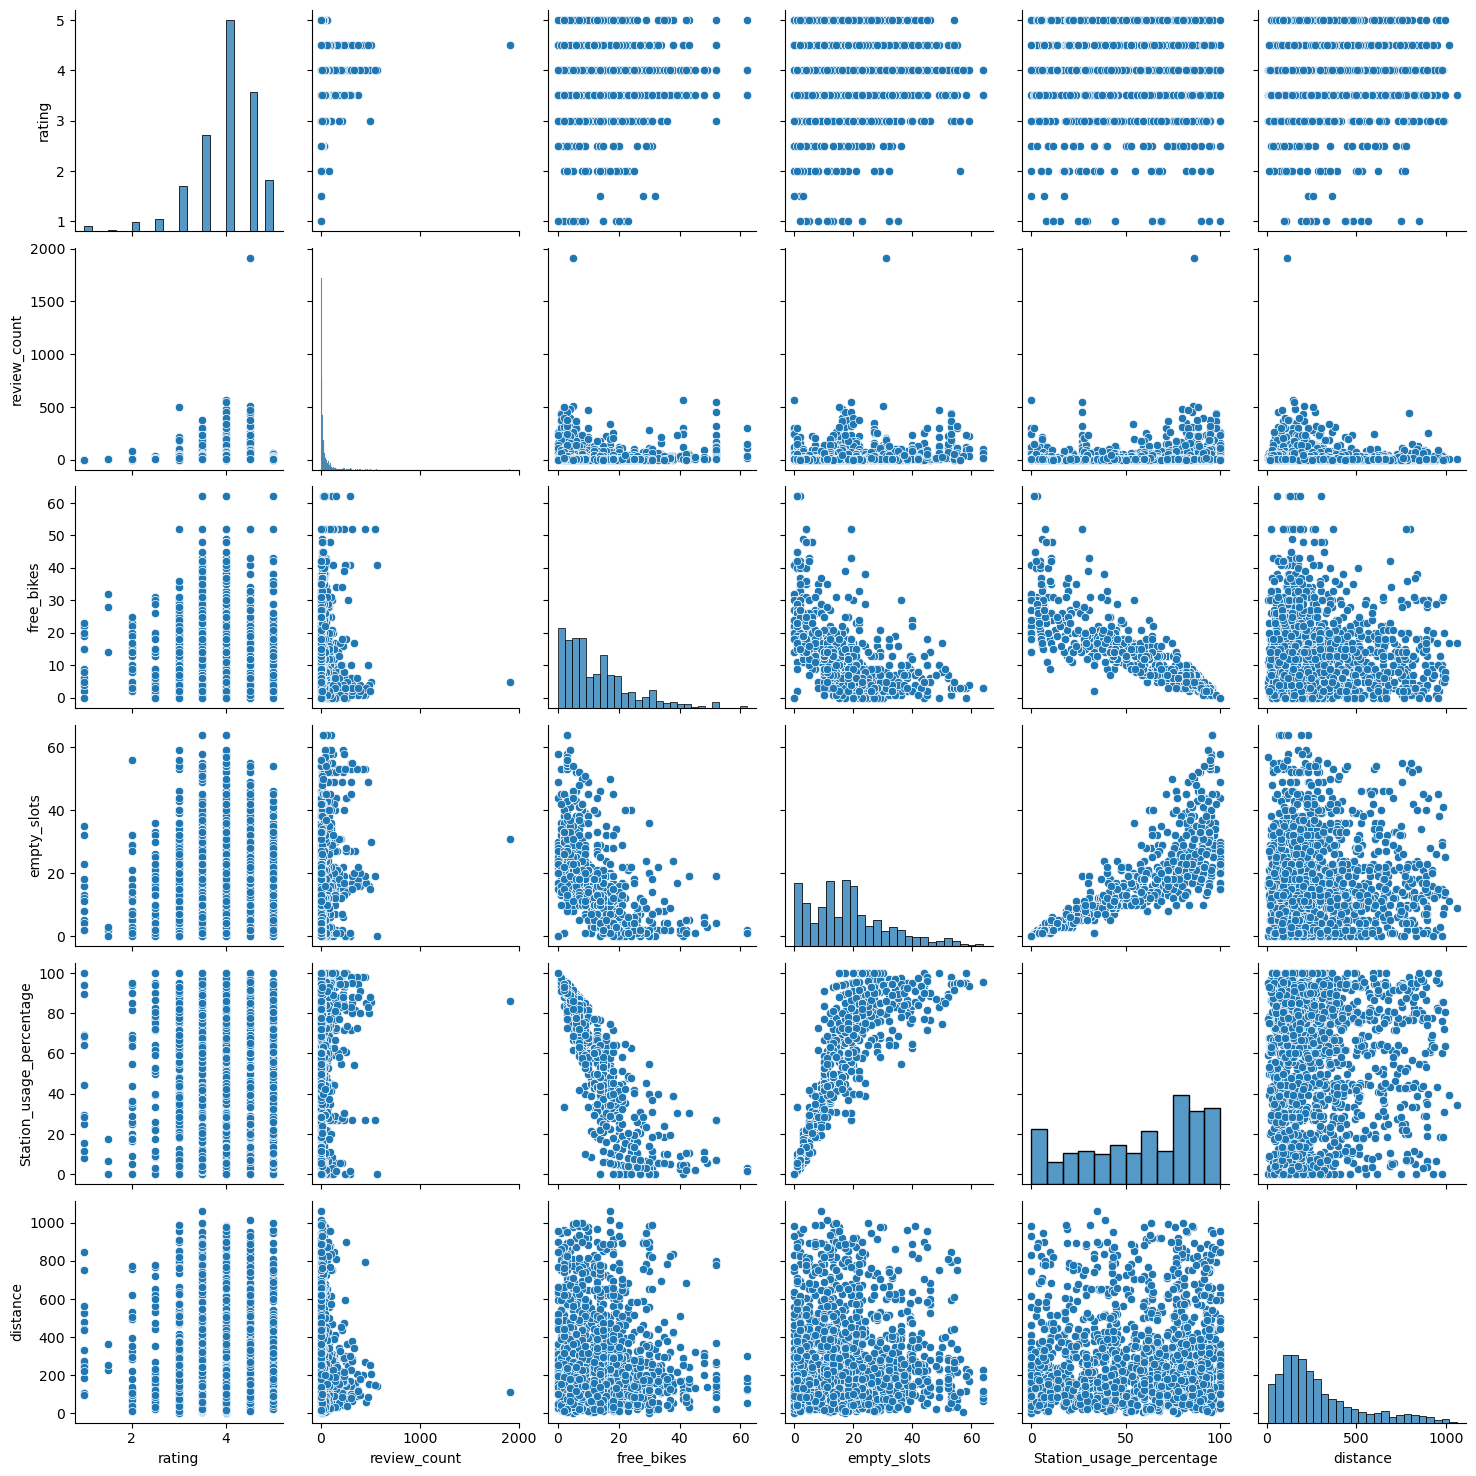

In [160]:
sns.pairplot(city_bikes_yelp_foursquare_merged,vars=['rating','review_count','free_bikes','empty_slots','Station_usage_percentage','distance'])
plt.show()

# Database


### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [182]:
import sqlite3
from sqlite3 import Error

In [183]:
# Creating connection to SQL

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f" error '{e}' occurred")

    return connection

In [185]:
path = "data/city_bikes_yelp_foursquare.sqlite"
connection = create_connection(path)

Connection to SQLite DB successful


In [186]:
# Cursor function to execute query

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as e:
        print(f"The error '{e}' occurred")
        

In [187]:
# Creating Tables

create_city_bikes_paris = """
CREATE TABLE IF NOT EXISTS create_city_bikes_paris (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    latitude FLOAT,
    longitude FLOAT,
    name TEXT NOT NULL,
    free_bikes INTEGER,
    empty_slots INTEGER,
    uid INTEGER
);
"""
execute_query(connection, create_city_bikes_paris)

Query successful


### Inserting data from csv to the Table

In [188]:
create_city_bikes_paris = pd.read_csv("data/df_city_bikes_paris.csv")  

create_city_bikes_paris.to_sql("create_city_bikes_paris", connection, if_exists='replace', index=False)


C:\Users\nasir\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:2605: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [205]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [210]:
select_city_bikes = "SELECT * from create_city_bikes_paris Limit 10"
city_bikes = execute_read_query(connection, select_city_bikes)

for bike in city_bikes:
    print(bike)


(0, 48.865983, 2.275725, 'Benjamin Godard - Victor Hugo', 5, 30, '16107')
(1, 48.85375581, 2.3390958090000002, 'André Mazet - Saint-André des Arts', 1, 53, '6015')
(2, 48.86787248, 2.364898216, 'Faubourg Du Temple - Republique', 6, 27, '11037')
(3, 48.85645199, 2.3348518830000002, 'Beaux-Arts - Bonaparte', 4, 16, '6021')
(4, 48.87929592, 2.337360084, 'Toudouze - Clauzel', 3, 17, '9020')
(5, 48.85590756, 2.392570674, 'Charonne - Robert et Sonia Delaunay', 1, 19, '11104')
(6, 48.84085531, 2.387554944, 'Mairie du 12ème', 30, 0, '12109')
(7, 48.85129643, 2.32506182, 'Square Boucicaut', 6, 52, '7003')
(8, 48.85151882, 2.343670316, 'Harpe - Saint-Germain', 0, 44, '5001')
(9, 48.88197329999999, 2.301132157, "Jouffroy d'Abbans - Wagram", 16, 6, '17026')


### Creating second table containng Foursquare,yelp data

In [212]:
# Creating Tables

city_bikes_yelp_foursquare = """
CREATE TABLE IF NOT EXISTS city_bikes_yelp_foursquare (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    rating FLOAT,
    review_count INTEGER,
    categories TEXT,
    distance INTEGER,
    latitude  FLOAT,
    longitude  FLOAT
);
"""
execute_query(connection, city_bikes_yelp_foursquare)

Query successful


### Inserting data from csv to the Table

In [213]:
city_bikes_yelp_foursquare = pd.read_csv("data/city_bikes_yelp_foursquare_merged.csv")  

city_bikes_yelp_foursquare.to_sql("city_bikes_yelp_foursquare", connection, if_exists='replace', index=False)

In [216]:
select_pois = "SELECT * from city_bikes_yelp_foursquare Limit 10"
pois = execute_read_query(connection, select_pois)

for poi in pois:
    print(poi)


('La Coïncidence', 4.5, 509, 'French', 206, 48.865983, 2.275725)
('Le Poincaré', 4.0, 142, 'French, Brasseries, Wine Bars', 189, 48.865983, 2.275725)
('Sgabetti', 4.5, 39, 'Italian', 247, 48.865983, 2.275725)
('Hiramatsu', 4.5, 32, 'French', 209, 48.865983, 2.275725)
('Bon', 4.0, 119, 'French, Pan Asian', 146, 48.865983, 2.275725)
('Le Stella', 4.0, 76, 'French, Brasseries', 66, 48.865983, 2.275725)
('Le Petit Rétro', 4.0, 36, 'Bistros', 171, 48.865983, 2.275725)
("Café de l'Homme", 3.5, 101, 'French', 182, 48.865983, 2.275725)
('Corso', 4.0, 38, 'Italian', 109, 48.865983, 2.275725)
("Schwartz's Deli", 3.5, 63, 'Burgers, American (Traditional)', 280, 48.865983, 2.275725)
